In [21]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage
import seaborn as sns
sys.path.append("../")

import src.paper_utils as utils
import src.plot as myplot
import sklearn

In [22]:

import importlib
import importlib.util

importlib.reload(myplot)
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [23]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
sample_sizes = [5000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/OUTPUT/mcm/sample_sizes")
test_mcms, test_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [54]:
sample_idx = 0
run_idx = 0
# digit_pair = [0,5]

indic_conf_m = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        all_byk_pair, all_byk_modspin, all_comms, all_dists = utils.get_all_byk_pair(test_probs, test_mcms, (i,j), sample_idx, run_idx, return_comms=True,return_dists=True)
        all_byk_pair = utils.adjust_smaller_icc(all_byk_pair,all_byk_modspin)
        indic_conf_m[i,j] = np.mean([all_dists[i][all_comms[i]] for i in range(2)])
        indic_conf_m[j,i] = indic_conf_m[i,j]

/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py:606: RuntimeWarning: divide by zero encountered in scalar divide
  c_all_byk[mods_long_short[0]][i,...] *= 1/(2**np.abs(r_diff))


In [55]:
indic_conf_m

array([[ 0.13182614,  0.40037951,  0.1087882 ,  0.12913076,  0.16288216,
         0.15561324,  0.179226  ,  0.23211724,  0.14611138,  0.21586573],
       [ 0.40037951,  0.2945714 , -0.01817301,  0.00701476,  0.00960067,
         0.00878073, -0.00265545,  0.12013152,  0.02931936,  0.05619769],
       [ 0.1087882 , -0.01817301,  0.12600178,  0.14114641,  0.17402304,
         0.15521207,  0.18768159,  0.25085815,  0.1513407 ,  0.22180568],
       [ 0.12913076,  0.00701476,  0.14114641,  0.14378136,  0.16918924,
         0.14539392,  0.16145778,  0.23116584,  0.13946108,  0.2102365 ],
       [ 0.16288216,  0.00960067,  0.17402304,  0.16918924,  0.17188441,
         0.13469295,  0.1503139 ,  0.22536815,  0.14206819,  0.21725314],
       [ 0.15561324,  0.00878073,  0.15521207,  0.14539392,  0.13469295,
         0.15147659,  0.14944872,  0.23587051,  0.14350213,  0.20074936],
       [ 0.179226  , -0.00265545,  0.18768159,  0.16145778,  0.1503139 ,
         0.14944872,  0.17505   ,  0.20394054

([<matplotlib.axis.YTick at 0x12c468a10>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

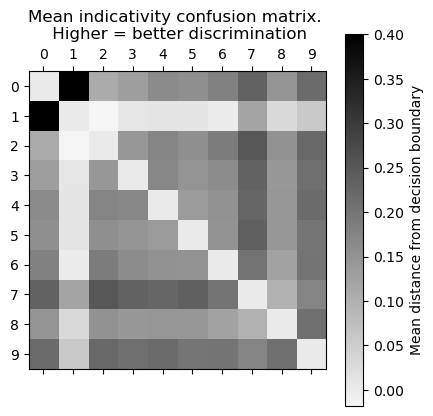

In [57]:
np.fill_diagonal(indic_conf_m, 0)

cmap =myplot.cmap_to_gray("black",reverse=True)
im = plt.matshow(indic_conf_m, interpolation="nearest", cmap=cmap)
plt.title("Mean indicativity confusion matrix. \n Higher = better discrimination")
plt.colorbar().set_label("Mean distance from decision boundary")
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)


# myplot.plot_confusion_matrix(indic_conf_m,10,logScale=False,cmap=myplot.cmap_to_gray("black",reverse=True),title="Mean indicativity confusion matrix")
# do not need to adjust because we are just summing up pixels i think

array([[ 0.13182614,  0.40037951,  0.1087882 ,  0.12913076,  0.16288216,
         0.15561324,  0.179226  ,  0.23211724,  0.14611138,  0.21586573],
       [ 0.40037951,  0.2945714 , -0.01817301,  0.00701476,  0.00960067,
         0.00878073, -0.00265545,  0.12013152,  0.02931936,  0.05619769],
       [ 0.1087882 , -0.01817301,  0.12600178,  0.14114641,  0.17402304,
         0.15521207,  0.18768159,  0.25085815,  0.1513407 ,  0.22180568],
       [ 0.12913076,  0.00701476,  0.14114641,  0.14378136,  0.16918924,
         0.14539392,  0.16145778,  0.23116584,  0.13946108,  0.2102365 ],
       [ 0.16288216,  0.00960067,  0.17402304,  0.16918924,  0.17188441,
         0.13469295,  0.1503139 ,  0.22536815,  0.14206819,  0.21725314],
       [ 0.15561324,  0.00878073,  0.15521207,  0.14539392,  0.13469295,
         0.15147659,  0.14944872,  0.23587051,  0.14350213,  0.20074936],
       [ 0.179226  , -0.00265545,  0.18768159,  0.16145778,  0.1503139 ,
         0.14944872,  0.17505   ,  0.20394054

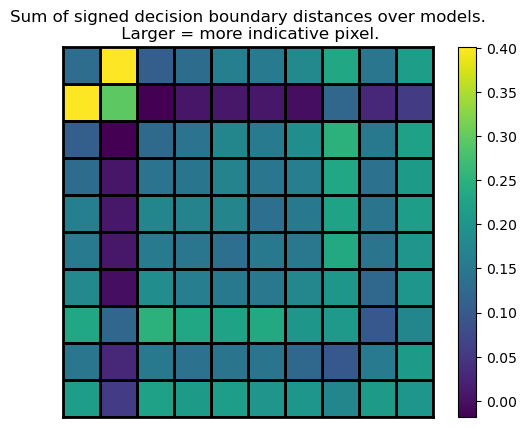

In [31]:
# dist_map_sum = np.sum([all_dists[i][all_comms[i]] for i in range(2)], axis=0)

# plt.title("Sum of signed decision boundary distances over models.\n Larger = more indicative pixel.")
# myplot.partition_map(plt.gca(), indic_conf_m, None,borders=myplot.find_borders(np.arange(121).reshape((11,11))),cmap="viridis",cbar=True, normalise=False)
# indic_conf_m